# 8. Equilibria in Ion Exchange systems

In ion exchange processes adsorption takes place through by exchanging the counterions bound to charged ligands immobilised on the stationary phase. 
In the following examples the ligands are anionic and monovalent and are indicated with $R^-$. 

## 8.1 Monovalent, symmetric cation exchange. 

Let us consider an ion exchange system in which the cations that are selectively displaced from the liquid phase are indicated as $A^+$, while the ligand counterions are indicated with $B^+$. 
The ion exchange reaction considered can be written as:

$$
A^+ + R^-B^+ + X^- \leftrightarrows B^+ + R^-A^+ + X^- \\
$$
where $X^-$ are spectator anions. 

The isotherm in the case of an ion exchange process can be derived starting from the equilibrium constant for the ion exchange reaction. 
If we indicate with $C_A$, $C_B$ the concentration of cations A and B in the fluid phase and with $n_A$, $n_B$ their respective concentration in the adsorbed phase. 

The equilibrtium constant is written as: 
$$
K_{AB}=\frac{n_AC_B}{n_BC_A}
$$(eq1)

The concentration of surface ligands is related to the concentration in the adsorbed phase of cations $A^+$ and $B^+$ by the following expression: 
$$
n_R=n_A+n_B
$$(eq2)

The total cationic concentration in the fluid phase $C_T$ is analogously defined as: 
$$
C_T=C_A+C_B
$$(eq3)

hence the equilibrium constant becomes: 
$$
K_{AB}=\frac{n_A(C_T-C_A)}{(n_R-n_A)C_A}
$$(eq4)

This expression can be manipulated to provide an explicit relation between the concetration in the adsorbed phase $n_A$, and the concentration in the fluid phase $C_A$, i.e. an isotherm for the ion exchange process:

$$
n_A=\frac{n_RK_{AB}C_A}{C_T+C_A(K_{AB}-1)}
$$(eq5)

This expression can be further simplified by introducing the molar fractions in the adsorbed and fluid phases indicated with $y_A$ and $x_A$, respectively:

$$
y_A=\frac{K_{AB}x_A}{1+x_A(K_{AB}-1)}
$$(eq6)

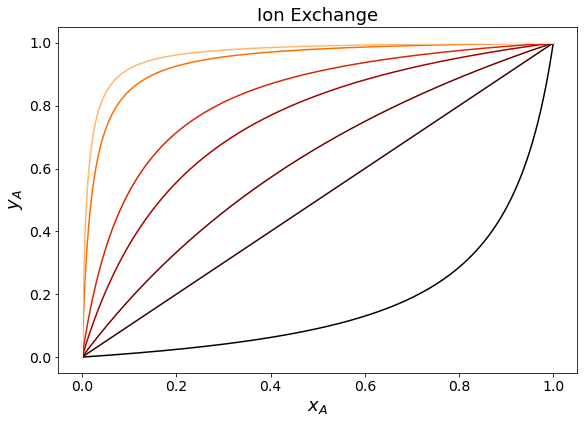

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# molar fraction in the feed
z = 0.3
N = 500 #number of points
x = np.linspace(0, 1, N)
kAB = np.array([0.1, 1, 2, 5, 10, 50, 100, 1000]);

color=iter(cm.gist_heat(np.linspace(0,1,np.size(kAB))))

for i in range(0,np.size(kAB)):     
    c=next(color)
    #Langmuir isotherm
    y = kAB[i] * x  / (1 + x*(kAB[i]-1)) 
    axes.plot(x,y, marker=' ' , c=c)

    
plt.title('Ion Exchange', fontsize=18);
axes.set_xlabel('$x_A$', fontsize=18);
axes.set_ylabel('$y_A$',fontsize=18);

The concentration of surface groups in the statrionary phase $n_R$ also plays a role in determining the amound adsorbed. In the following we report the concentration in the adsorbed phase, in equilibrium with an arbitrary molar fraction $x_A'$ in the fluid phase as a function of the affinity towards the stationary phase (captured by the equilibrium constant $K_{AB}$) and of the density of surface charged ligands $n_R$. 

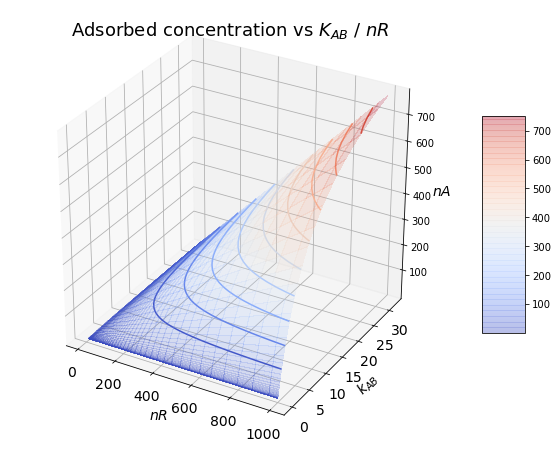

In [10]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

# Parameters: 
# molar fraction in the feed
N = 100 #number of points
kAB = np.logspace(-3, 1.5, N)
nR = np.logspace(1, 3, N)
x = 0.1 ; # arbitrary value of C'
kAB, nR = np.meshgrid(kAB, nR) 

nA = nR * kAB * x  / (1 + x*(kAB-1)) 


#Plotting

figure=plt.figure(figsize=(10, 8))
axes = figure.gca(projection ='3d') 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


surf=axes.plot_surface(nR,kAB,nA,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.2)

contour=axes.contour(nR,kAB,nA,np.linspace(100, 800, 10),cmap=cm.coolwarm)

plt.title('Adsorbed concentration vs $K_{AB}$ / $nR$', fontsize=18);
axes.set_xlabel('$nR$', fontsize=14);
axes.set_ylabel('$k_{AB}$',fontsize=14);
axes.set_zlabel('$nA$',fontsize=14);
figure.colorbar(surf, shrink=0.5, aspect=5);